# EXPLORATORY DATA ANALYSIS AND DATA MODEING OF AIRBNB DATASET

## MOTIVATION

The aim of this project is to analyze prices and avilability of Airbnb listings in Amsterdam through exploratory data analysis, focusing primarily on comparing average prices (per person per night) in different city, and trying to identify value-adding features that might be interesting to the visitors of Amsterdam to rent an Airbnb and the mean difference in the price based on several factors.

The analysis provides a general overview of the Airbnb market in Amsterdam, and can also serve as a guide to all future visitors, as it answers questions such as where to stay if travelling on budget.

I feel that location is one of the principle factors affecting Airbnb costs, however fair and square of individual postings there are clearly a few other separating viewpoints. In my analysis I intend to distinguish highlights that increase the value of Airbnb condos, by investigating the data contained in listings’ textual descriptions. My answer addresses, for example, how much extra on normal one needs to pay if a loft is advertised as luxurious, spacious, cosy, modern, and so on., or how large is the premium for having a garden or porch, or quite certain to Amsterdam, the amount progressively costly it is to remain only close to a channel, or on it, in a houseboat.In the last piece of my analysis I am also trying to distinguish several amenities that increases the price if Airbnb. 

My porject is divided in three notebooks.
- Notebook 1: This notebook focuses on cleaning and pre-processing the data for Exploratory Data Analysis. 
- Notebook 2: Exploratory Data Analysis is done in this section to understand the data in a visualized form. 
- Notebook 3: Different models are built in this notebook using various Machine Learning Algorithms and selecting the best   algorithm for predicting the price of an Airbnb listing.  


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#REading the data 
airbnb_data = pd.read_csv(r'C:\Users\upasa\OneDrive\Desktop\Coding Challenge\listings.csv')

In [3]:
# Calculating total no of rows and columns
airbnb_data.shape

(20677, 106)

In [4]:
#Checking data
airbnb_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


With this, I am not able to access all the columns in the datset. I will look into 10 columns at a time. 

In [5]:
airbnb_data[list(airbnb_data.columns)[:10]].head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne..."


In [6]:
airbnb_data[list(airbnb_data.columns)[10:20]].head(1)

,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id
0,From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159


In [7]:
airbnb_data[list(airbnb_data.columns)[20:30]].head(1)

,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url
0,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...


In [8]:
airbnb_data[list(airbnb_data.columns)[30:40]].head(1)

,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed
0,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt


In [9]:
airbnb_data[list(airbnb_data.columns)[40:50]].head(1)

,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude
0,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142


In [10]:
airbnb_data[list(airbnb_data.columns)[50:60]].head(1)

,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet
0,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN


In [11]:
airbnb_data[list(airbnb_data.columns)[60:70]].head(1)

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights
0,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3


In [12]:
airbnb_data[list(airbnb_data.columns)[70:80]].head(1)

,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90
0,3,15,15,3.0,15.0,today,t,8,18,43


In [13]:
airbnb_data[list(airbnb_data.columns)[80:90]].head(1)

,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin
0,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0


In [14]:
airbnb_data[list(airbnb_data.columns)[90:100]].head(1)

,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture
0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f


In [15]:
airbnb_data[list(airbnb_data.columns)[100:]].head(1)

,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,f,1,0,1,0,2.12


With the outputs obtained I see that there are various columns like id, listing_url, scrp_id, last_scrped, name, summary, space, description, neighbourhood_overview, notes, transit, access, interation, house_rules, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_location, host_about, host_thumbnail_url, host_picture_url, host_neighbourhood, host_verifications, calendar_last_scraped, host_has_profile_pic which are not useful for either exploratory data analysis an well as for data modeling. There would be many other such variables that would be not used for EDA and Data modeling. I would be dropping these columns from the dataset now and some later in this project. 

In [16]:
#Dropping columns that are not useful for EDA oo Model Building
drop_columns = ['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic','host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
airbnb_data = airbnb_data.drop(drop_columns, axis=1)

I would be calculating the total number of null values associated with the columns in the dataset and then analyzing those columns based on the output obtained. 

In [17]:
#Calculating null values
airbnb_data.isna().sum().sort_values(ascending=False)

neighbourhood_group_cleansed                    20677
host_acceptance_rate                            20677
license                                         20652
square_feet                                     20291
monthly_price                                   19269
weekly_price                                    18086
host_response_time                               8541
host_response_rate                               8541
security_deposit                                 6202
cleaning_fee                                     3721
review_scores_checkin                            2837
review_scores_value                              2835
review_scores_location                           2835
review_scores_communication                      2830
review_scores_accuracy                           2827
review_scores_cleanliness                        2825
review_scores_rating                             2816
first_review                                     2593
last_review                 

After finding the sum of null values in each column, I see that many columns do have maximum null values for some variables like host_acceptance_rate, neighbourhood_group_cleansed, license, square_feet, monthly_price, weekly_price. Imputing 80% of null values in this columns would not be a right approach. I would be dropping these variables from the dataset. 


In [18]:
#Dropping columns with more than 80% null values
airbnb_data.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names'], axis=1, inplace=True)
airbnb_data.set_index('id', inplace=True) 

I see that from the variable names like host_listings_count and host_total_listings_count are the same columns as they are counting the host listing. I feel that these variable would be highly correlated. If the highly corelated variables are used for model building there would be an information leak while building the model, which would result in over fitting. Hence in this case of these columns should be dropped. Also the other columns that would be highly corelated should be removed from the dataset to avoid 100% accuracy of the model performance for all machine learning algorithms. 

In [19]:
#Dropping columns that has almost the same information in another column
airbnb_data.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

Over the years, the parameters for listing Airbnb changes. There are various columns like maximum_nights_avg_ntm,minimum_nights_avg_ntm, maximum_maximum_nights, minimum_maximum_nights, maximum_minimum_nights, minimum_minimum_nights would change. But the definition for maximum nights and minimum nights would remain the same. Hence for this reason I am dropping these columns from the dataset. 

In [20]:
#Dropping the columns whose definition would over the years and also would't contribute much in data modeling and EDA. 
airbnb_data.drop(['maximum_nights_avg_ntm','minimum_nights_avg_ntm', 'maximum_maximum_nights', 'minimum_maximum_nights', 'maximum_minimum_nights', 'minimum_minimum_nights'],axis=1, inplace=True)

Similarly, by the name itself of the columns number_of_reviews and number_of_reviews_ltm are same and this would lead to information leakage because of being highly corelated. Hence dropping these colums too.

In [21]:
#Dropping columns that are corelated
airbnb_data.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

I will be checking the total columns left after dropping them from the dataset.  

In [22]:
#Checking columns after many being dropped for further analysis
airbnb_data.isna().sum().sort_values(ascending=False)

host_response_rate                  8541
host_response_time                  8541
security_deposit                    6202
cleaning_fee                        3721
review_scores_checkin               2837
review_scores_value                 2835
review_scores_location              2835
review_scores_communication         2830
review_scores_accuracy              2827
review_scores_cleanliness           2825
review_scores_rating                2816
last_review                         2593
first_review                        2593
zipcode                              886
neighbourhood                        831
state                                219
market                                40
name                                  35
host_identity_verified                12
host_listings_count                   12
host_is_superhost                     12
host_since                            12
bedrooms                               8
beds                                   8
bathrooms       

Much of the data is cleaned. Yet the data is not 100% ready to be used. First I will check the data type of the columns and then analyze the next step to be done. 

In [23]:
#Checking the datatypes
airbnb_data.dtypes

name                                 object
experiences_offered                  object
host_since                           object
host_response_time                   object
host_response_rate                   object
host_is_superhost                    object
host_listings_count                 float64
host_identity_verified               object
street                               object
neighbourhood                        object
neighbourhood_cleansed               object
city                                 object
state                                object
zipcode                              object
market                               object
smart_location                       object
country_code                         object
country                              object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                       

Now I will be cleaning the columns one by one. While cleaning, if any of the columns which seems not be important, I will be dropping them. 

For renting an apartment from Airbnb listing, price and availability are the important factors that plays a vital role. There are various factors on which the price is based on. I would be starting by cleaning and polishing the price category and then proceeding with the factors on which the price is based on, then availability followed by the other variables in the dataset. 

### Price

Price includes price of a room, security deposit, cleaning fees and extra people cost if any. So I would display these columns and analyze the values in the dataset. 

In [24]:
airbnb_data[['price','security_deposit','cleaning_fee', 'extra_people']].head()

,price,security_deposit,cleaning_fee,extra_people
id,,,,
2818,$59.00,$200.00,$60.00,$20.00
20168,$80.00,NaN,NaN,$0.00
25428,$125.00,$300.00,$40.00,$10.00
27886,$150.00,$0.00,$0.00,$0.00
28871,$75.00,NaN,NaN,$0.00


With the outputs obtained I see that there are null values in security deposit and in cleaning fees, whereas price, security_deposit, cleaning_fee, and extra_people (extracharge per person) has a special charater. Having special charater in the dataset is not a good approach for data modeling. First I will count the total number of missing values in these columns. Filling in the missing values either by mean or meadian or by any other approach would not be a good decision. Hence I would be replacing the null values of these columns by Zero '0' and remove the special charaters. 

Cleaning the price column

In [25]:
#Counting nul values
airbnb_data['price'].isna().sum()

0

There is no null value in price. I will just replace the special characters. 

In [26]:
#Removing the special character
airbnb_data['price'] = airbnb_data['price'].str.replace("$","").str.replace(',','').astype(float)

### Security Deposit

Cleaning the security_deposit column

In [27]:
#Counting nul values
airbnb_data['security_deposit'].isna().sum()

6202

In [28]:
#Removing the special character and filling in the null values 
airbnb_data['security_deposit'] = airbnb_data['security_deposit'].str.replace("$","").str.replace(',','').astype(float)
airbnb_data.security_deposit.fillna(0, inplace=True)

### Cleaning Fee

Cleaning the cleaning_fee column

In [29]:
#Counting nul values
airbnb_data['cleaning_fee'].isna().sum()

3721

In [30]:
#Removing the special character and filling in the null values 
airbnb_data['cleaning_fee'] = airbnb_data['cleaning_fee'].str.replace("$","").str.replace(',','').astype(float)
airbnb_data.cleaning_fee.fillna(0, inplace=True)

### Extra People

Cleaning the extra_people column

In [31]:
#Counting nul values
airbnb_data['extra_people'].isna().sum()

0

There is no null value in the extra_people column. So I will replace the special character and change the datatype. 

In [32]:
#Removing the special character
airbnb_data['extra_people'] = airbnb_data['extra_people'].str.replace("$","").str.replace(',','').astype(float)

In [33]:
airbnb_data[['price','security_deposit','cleaning_fee', 'extra_people']].head()

,price,security_deposit,cleaning_fee,extra_people
id,,,,
2818,59.0,200.0,60.0,20.0
20168,80.0,0.0,0.0,0.0
25428,125.0,300.0,40.0,10.0
27886,150.0,0.0,0.0,0.0
28871,75.0,0.0,0.0,0.0


Hence the price, security_deposit, cleaning_fee, extra_people columns are cleaned. 

There are various factors that affects the price. These factors are:

- Property type
- Total number of bathroom
- Total number of bedroom
- Amenities
- Neighborhood and others 

I would start cleaning these columns. 

### Property type 

I will count the type of properties in Airbnb listing

In [34]:
#Counting the types of property
airbnb_data['property_type'].value_counts()

Apartment                 15832
House                      1641
Townhouse                   671
Bed and breakfast           549
Loft                        392
Boat                        351
Condominium                 334
Houseboat                   290
Guest suite                 146
Aparthotel                  119
Serviced apartment           69
Guesthouse                   49
Boutique hotel               43
Villa                        39
Other                        39
Hostel                       29
Hotel                        23
Cottage                      12
Tiny house                   12
Cabin                        10
Camper/RV                     5
Bungalow                      3
Casa particular (Cuba)        3
Chalet                        3
Barn                          2
Yurt                          2
Island                        1
Nature lodge                  1
Lighthouse                    1
Earth house                   1
Hut                           1
Campsite

From the output, highest type of property type is of the type apartment, followed by house, townhouse and so on. The least type of properties listed are Lighhouse, hut, tent etc. Having too many categoris in one column would give me too many columns while doing Encoding of these categories. Hence, I would be classifying these property types into three main categories: Apartment, House and Other.  

In [35]:
# Replacing categories that are types of houses or apartments
airbnb_data.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
airbnb_data.loc[~airbnb_data.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [36]:
airbnb_data['property_type'].value_counts()

Apartment    16293
House         2382
Other         2002
Name: property_type, dtype: int64

People also look into the total no of bedrooms aand bathroom. I will first see if any of these variables has a null values. 

### Bedrooms

In [37]:
#Calculating the null values
airbnb_data['bedrooms'].isna().sum()

8

There are 8 missing values in the bedrooms column. I will replace this missing value with median. Replacing the null value with the mean value is not a right way to replace the null values as it will take the average of bedrooms in the list. 

In [38]:
#Filling the null value with the median
airbnb_data['bedrooms'] = airbnb_data['bedrooms'].fillna(airbnb_data['bedrooms'].median())

### Beds

In [39]:
#Calculating the null values
airbnb_data['beds'].isna().sum()

8

There are 8 missing values in the bedrooms column. I will replace this missing value with median. 

In [40]:
#Filling the null value with the median
airbnb_data['beds'] = airbnb_data['beds'].fillna(airbnb_data['beds'].median())

There is one more variable related to bedroom is bedtype. Let explore this variable. 

### Types of Bed

In [41]:
#Checking the types of bed
airbnb_data['bed_type'].head(10)

id
2818     Real Bed
20168    Real Bed
25428    Real Bed
27886    Real Bed
28871    Real Bed
29051    Real Bed
31080    Real Bed
38266       Futon
42970    Real Bed
43109    Real Bed
Name: bed_type, dtype: object

While booking a Airbnb, generally people dont look into the bed type. It seems that types of bed type will not add value for data modeling too. I will drop this variable from the dataset. 

In [42]:
#Dropping the column bed types
airbnb_data.drop(['bed_type'], axis=1, inplace=True)

### Bathrooms

In [43]:
#Calculating the null values
airbnb_data['bathrooms'].isna().sum()

6

There are 6 missing values in the bedrooms column. I will replace this missing value with median.

In [44]:
#Filling the null value with the median
airbnb_data['bathrooms'] = airbnb_data['bathrooms'].fillna(airbnb_data['bathrooms'].median())

### Amenities

While choosing a house for renting, people look into amenities like wifi, Parking, Internet, T.V, 24-hour check in, etc. Hence for renting, these are also some essential parameters that people do consider and price also depends on these features as well. I would be analyzing this column in detail and find some important list of amenities. 

First I will split the amenities in a list 

In [45]:
#Calculating the null values
airbnb_data['amenities'].isna().sum()

0

### EXPERIENCE 

In [46]:
# Counting value
airbnb_data.experiences_offered.value_counts()

none    20677
Name: experiences_offered, dtype: int64

I see that maximum of the experience offered values are null. Hence I would be dropping this column as well. 

In [47]:
#Dropping the column
airbnb_data.drop(['experiences_offered'], axis=1, inplace=True)

Replacing the Categorical Variables such as false (f) abd true (t) with numercial values 1 and 1 respectively in the dataset. 

In [48]:
#Replacing the values
airbnb_data.replace({'f': 0, 't': 1}, inplace=True)

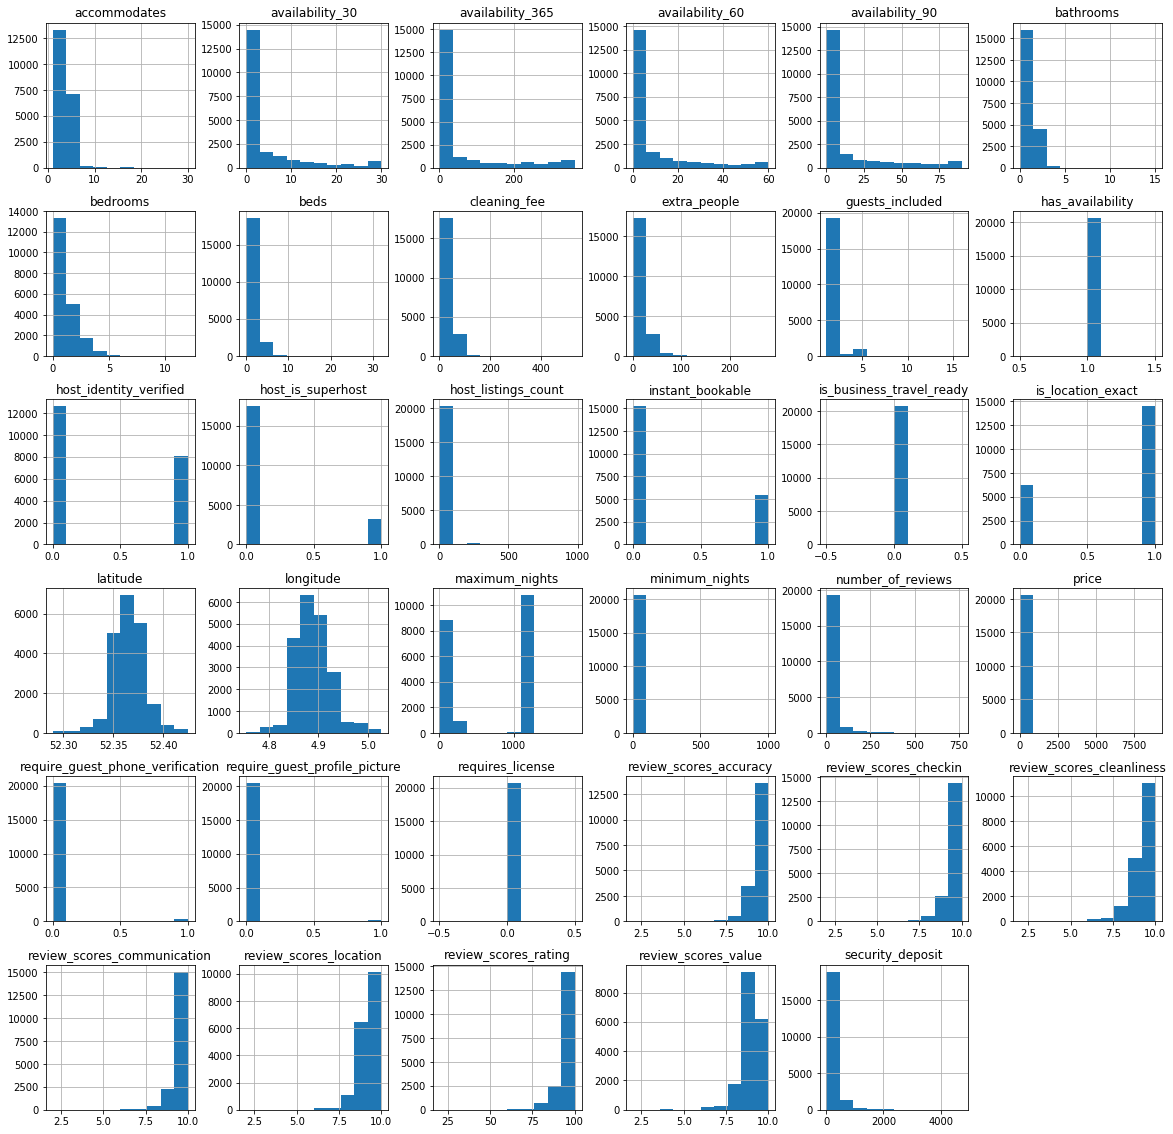

In [49]:
# Plotting the distribution
airbnb_data.hist(figsize=(20,20));

I see that many columns has just one category. Not all columns, but several columns having just one category would not be useful for data modeling and important too. Hence these columns needs to be dropped. 

In [50]:
#Dropping columns having just one category
airbnb_data.drop(['is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'requires_license'], axis=1, inplace=True)

### CANCELLATION POLICY

In [51]:
# Calculating null values
airbnb_data['cancellation_policy'].isna().sum()

1

In [52]:
#Filling the null value
airbnb_data['cancellation_policy'] = airbnb_data['cancellation_policy'].fillna('strict_14_with_grace_period')

### HOST SINCE

I feel that host_since is not an important parameter. How genuine is the host, can be determined by the total reviews for that listing. Hence I will drop this column from the datatset. 

In [53]:
#Dropping the column
airbnb_data.drop(['host_since'], axis=1, inplace=True)

### HOST RESPONSE TIME

Host response time is an important parameter, since when ever the Airbnb is booked, first we need to contact the host. So it very important for host to reply before booking. Hence I will be using this column. 

In [54]:
#Calculating the total null value
airbnb_data['host_response_time'].isna().sum()

8541

In [55]:
# Number of rows without a value for host_response_time which have also not yet had a review
len(airbnb_data[airbnb_data.loc[ :,['host_response_time ', 'first_review'] ].isnull().sum(axis=1) == 2])

2593

In [56]:
#Filling in the null value
airbnb_data.host_response_time.fillna("unknown", inplace=True)
airbnb_data.host_response_time.value_counts(normalize=True)

unknown               0.413068
within an hour        0.300672
within a few hours    0.145863
within a day          0.124293
a few days or more    0.016105
Name: host_response_time, dtype: float64

### HOST RESPONSE RATE

The host response rate depends on how soon the host replies. This is also important for a customer to consider before contacting the host and expect a reply. 

In [57]:
#Counting the null value
airbnb_data['host_response_rate'].isna().sum()

8541

In [58]:
# Removing the % sign from the host_response_rate string
airbnb_data.host_response_rate = airbnb_data.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(airbnb_data['host_response_rate'].mean(),0))
print("Median host response rate:", airbnb_data['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((airbnb_data.host_response_rate == 100.0).sum()/airbnb_data.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 74.3%


In [59]:
# Bining host response rate into four categories
airbnb_data.host_response_rate = pd.cut(airbnb_data.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting the host response rate into string
airbnb_data.host_response_rate = airbnb_data.host_response_rate.astype('str')

# Replacing the null value with unknown
airbnb_data.host_response_rate.replace('nan', 'unknown', inplace=True)

# Counting the values in each bins
airbnb_data.host_response_rate.value_counts()

100%       9011
unknown    8541
50-89%     1804
90-99%      809
0-49%       512
Name: host_response_rate, dtype: int64

### HOST IS A SUPERHOST

In [60]:
#Calculating the null value
airbnb_data['host_is_superhost'].isna().sum()

12

In [61]:
#Filling in the null value
airbnb_data.host_is_superhost.fillna("0", inplace=True)

Superhost means the host who are experienced and provide a shining example for other hosts, along with extraordinary experiences for their guests. Such superhosts gets excellent reviews and ratings and their listings are in a great demand. 

### AVAILABILITY

The column has_availability just tell whether the house listed in Airbnb is available or not. Where as in availability_30, availability_60, availability_90, availability_365, if it available its indicated as 1 or else its 0. I feel that has_availability gives the same information. Hence I will drop the column has_availability. 

In [62]:
#Dropping the column
airbnb_data.drop(['has_availability'], axis=1, inplace=True)

### REVIEW RATINGS

This is the most important parameter for a customer to booking an Airbnb. 

In [63]:
#Checking the null value
airbnb_data['review_scores_rating'].isna().sum()

2816

In [64]:
#Filling in the null value
airbnb_data.review_scores_rating.fillna("0", inplace=True)

### Review scores accuracy

In [65]:
#Checking the null value
airbnb_data['review_scores_accuracy'].isna().sum()

2827

In [66]:
#Filling in the null value
airbnb_data.review_scores_accuracy.fillna("0", inplace=True)

### Review scores checkin

In [67]:
#Checking the null value
airbnb_data['review_scores_communication'].isna().sum()

2830

In [68]:
#Filling in the null value
airbnb_data.review_scores_checkin.fillna("0", inplace=True)

### Review scores communication

In [69]:
#Checking the null value
airbnb_data['review_scores_communication'].isna().sum()

2830

In [70]:
#Filling in the null value
airbnb_data.review_scores_communication.fillna("0", inplace=True)

### Review scores location

In [71]:
#Checking the null value
airbnb_data['review_scores_location'].isna().sum()

2835

In [72]:
#Filling in the null value
airbnb_data.review_scores_location.fillna("0", inplace=True)

### Review scores value

In [73]:
#Checking the null value
airbnb_data['review_scores_value'].isna().sum()

2835

In [74]:
#Filling in the null value
airbnb_data.review_scores_value.fillna("0", inplace=True)

### Review scores cleanliness

In [75]:
#Checking the null value
airbnb_data['review_scores_cleanliness'].isna().sum()

2825

In [76]:
#Filling in the null value
airbnb_data.review_scores_cleanliness.fillna("0", inplace=True)

### Host listings count 

In [77]:
#Checking the null value
airbnb_data['host_listings_count'].isna().sum()

12

In [78]:
#Filling in the null value
airbnb_data.host_listings_count.fillna("0", inplace=True)

### COUNTRY

Since I am working on only one country dataset, i.e Amsterdam, I feel that this column is not important. I will drop this column. 

In [79]:
#Dropping the column
airbnb_data.drop(['country'], axis=1, inplace=True)

### COUNTRY CODE

As I have the county column, similarly country code column is also not important to me, as I am working only on Amsterdam country. So I will drop this column. 

In [80]:
#Dropping the column
airbnb_data.drop(['country_code'], axis=1, inplace=True)

### State

In [81]:
#Checking the null value
airbnb_data['state'].isna().sum()

219

In [82]:
#Filling in the null value
airbnb_data.state.fillna("Unknown", inplace=True)

### City

In [83]:
#Checking the null value
airbnb_data['city'].isna().sum()

4

In [84]:
#Filling in the null value
airbnb_data.state.fillna("Unknown", inplace=True)

### NEIGHBOURHOOD

There are two variables, neighbourhood and neighbourhood_cleansed. I feel that having two similar columns wouldn't add great value. Hence I will delete of them. i.e neighbourhood. 

In [85]:
#Dropping the column
airbnb_data.drop(['neighbourhood'], axis=1, inplace=True)

### Name

In [86]:
#Checking the null value
airbnb_data['name'].isna().sum()

35

In [87]:
#Fill in the missing comments in the reviews dataset
airbnb_data['name'].fillna('No_name', inplace = True)

I feel that some more columns like host_identity_verified, zipcode, market, smart_location, is_location_exact, first_review, last_review, are too important features for data analysis. I am restricting to the features that are important for customers to consider while booking Airbnb based on the availability, and the factors that are important for predicting the price. Hence I will remove these columns from the dataset. 

In [88]:
#Dropping the columns
airbnb_data.drop(['host_identity_verified', 'zipcode', 'market', 'smart_location', 'is_location_exact', 'first_review', 'last_review'], axis=1, inplace=True)

I have cleaned the data and identified the important columns for analysis. I am displaying those columns and the final columns for analysis. I have imputed the missing values, transformed the values and changed the data types of the columns if required. Now I have a polished data for Exploratory Data Analysis and Data modelling. 

In [89]:
#Checking the data types of the columns that would be used after cleaning the data
airbnb_data.dtypes

name                            object
host_response_time              object
host_response_rate              object
host_is_superhost               object
host_listings_count             object
street                          object
neighbourhood_cleansed          object
city                            object
state                           object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
amenities                       object
price                          float64
security_deposit               float64
cleaning_fee                   float64
guests_included                  int64
extra_people                   float64
minimum_nights                   int64
maximum_nights                   int64
calendar_updated         

In [90]:
# Saving the cleaned dataset
data_cleaned = airbnb_data.to_csv(r'C:\Users\upasa\OneDrive\Desktop\Coding Challenge\data_cleaned.csv', index=id, header=True)